In [1]:
%load_ext lab_black

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from scipy.stats.stats import pearsonr
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import (
    LinearRegression,
    LassoCV,
)
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate

from pprint import pprint

In [3]:
def cross_validate_report(model, X, y, show=True, return_coef=False):
    scoring = ["neg_mean_squared_error", "neg_root_mean_squared_error"]

    result = cross_validate(
        model, X, y, scoring=scoring, return_train_score=True, return_estimator=True
    )

    coef_estimates = [list(estimator.coef_) for estimator in result["estimator"]]

    cv_train_mse = -result["train_neg_mean_squared_error"].mean()
    cv_train_rmse = -result["train_neg_root_mean_squared_error"].mean()

    cv_test_mse = -result["test_neg_mean_squared_error"].mean()
    cv_test_rmse = -result["test_neg_root_mean_squared_error"].mean()

    if show:
        print("Train Metrics:")
        print(f"CV Train MSE: {cv_train_mse}")
        print(f"CV Train RSME: {cv_train_rmse}")
        print()
        print("Test Metrics")
        print(f"CV Test MSE: {cv_test_mse}")
        print(f"CV Test MSE: {cv_test_rmse}")
        print()
        print(f"Coefficient Estimates Across Folds: ")
        pprint(coef_estimates)

    if return_coef:
        return coef_estimates

In [4]:
SEED = 1232
N_OBS = 1000

In [5]:
np.random.seed(SEED)

In [6]:
x_1 = np.random.uniform(0, 10, N_OBS)
e = np.random.normal(0, 1, N_OBS)
y = 3 + 2 * x_1 + e

In [7]:
X_1 = x_1.reshape(-1, 1)

cross_validate_report(LinearRegression(), X_1, y)

Train Metrics:
CV Train MSE: 1.0792438158316893
CV Train RSME: 1.0386981873822758

Test Metrics
CV Test MSE: 1.082097929792948
CV Test MSE: 1.037556273372198

Coefficient Estimates Across Folds: 
[[1.9941598842341444],
 [2.003269153324389],
 [1.9952964817410503],
 [1.9894677458455363],
 [1.9885074228378194]]


In [8]:
g = np.random.normal(0, 0.1, N_OBS)
x_2 = -x_1 + g

In [9]:
r, _ = pearsonr(x_1, x_2)
print(r)

-0.9994011519880747


In [10]:
X_2 = x_2.reshape(-1, 1)

cross_validate_report(LinearRegression(), X_1, y)

Train Metrics:
CV Train MSE: 1.0792438158316893
CV Train RSME: 1.0386981873822758

Test Metrics
CV Test MSE: 1.082097929792948
CV Test MSE: 1.037556273372198

Coefficient Estimates Across Folds: 
[[1.9941598842341444],
 [2.003269153324389],
 [1.9952964817410503],
 [1.9894677458455363],
 [1.9885074228378194]]


In [11]:
X = np.concatenate((X_1, X_2), axis=1)
cross_validate_report(LinearRegression(), X, y)

Train Metrics:
CV Train MSE: 1.0788023801138984
CV Train RSME: 1.0384833870357348

Test Metrics
CV Test MSE: 1.0835298196452652
CV Test MSE: 1.0382160432570071

Coefficient Estimates Across Folds: 
[[1.8029027470038652, -0.19109142585953637],
 [1.6384195458596402, -0.3643687849363034],
 [1.8564194447233686, -0.1385964284121925],
 [2.0454448403573444, 0.055878025959504085],
 [1.8401177092087693, -0.14817814320570755]]


In [12]:
np.linspace(0.5, 0.1)

array([0.5       , 0.49183673, 0.48367347, 0.4755102 , 0.46734694,
       0.45918367, 0.45102041, 0.44285714, 0.43469388, 0.42653061,
       0.41836735, 0.41020408, 0.40204082, 0.39387755, 0.38571429,
       0.37755102, 0.36938776, 0.36122449, 0.35306122, 0.34489796,
       0.33673469, 0.32857143, 0.32040816, 0.3122449 , 0.30408163,
       0.29591837, 0.2877551 , 0.27959184, 0.27142857, 0.26326531,
       0.25510204, 0.24693878, 0.23877551, 0.23061224, 0.22244898,
       0.21428571, 0.20612245, 0.19795918, 0.18979592, 0.18163265,
       0.17346939, 0.16530612, 0.15714286, 0.14897959, 0.14081633,
       0.13265306, 0.1244898 , 0.11632653, 0.10816327, 0.1       ])

In [13]:
data = []

for gamma_std in np.linspace(0.1, 0.01):
    g = np.random.normal(0, gamma_std, N_OBS)
    x_2 = -x_1 + g
    X_2 = x_2.reshape(-1, 1)
    X = np.concatenate((X_1, X_2), axis=1)

    r, _ = pearsonr(x_1, x_2)
    coefs_across_folds = cross_validate_report(
        LinearRegression(), X, y, show=False, return_coef=True
    )

    for coefs_fold in coefs_across_folds:
        beta_1 = coefs_fold[0]
        beta_2 = coefs_fold[1]
        data.append(
            {"gamma_std": gamma_std, "r": r, "beta_1": beta_1, "beta_2": beta_2}
        )

In [14]:
plot_df = pd.DataFrame(data)

In [15]:
plot_df

,gamma_std,r,beta_1,beta_2
0,0.10,-0.999431,2.059902,0.065818
1,0.10,-0.999431,2.161380,0.158175
2,0.10,-0.999431,2.104533,0.109320
3,0.10,-0.999431,2.486694,0.497663
4,0.10,-0.999431,2.147180,0.158803
...,...,...,...,...
245,0.01,-0.999994,1.147808,-0.846427
246,0.01,-0.999994,0.846962,-1.156335
247,0.01,-0.999994,1.189663,-0.805734
248,0.01,-0.999994,-1.720404,-3.710006


In [16]:
plot_df["r"].abs()

0      0.999431
1      0.999431
2      0.999431
3      0.999431
4      0.999431
         ...   
245    0.999994
246    0.999994
247    0.999994
248    0.999994
249    0.999994
Name: r, Length: 250, dtype: float64

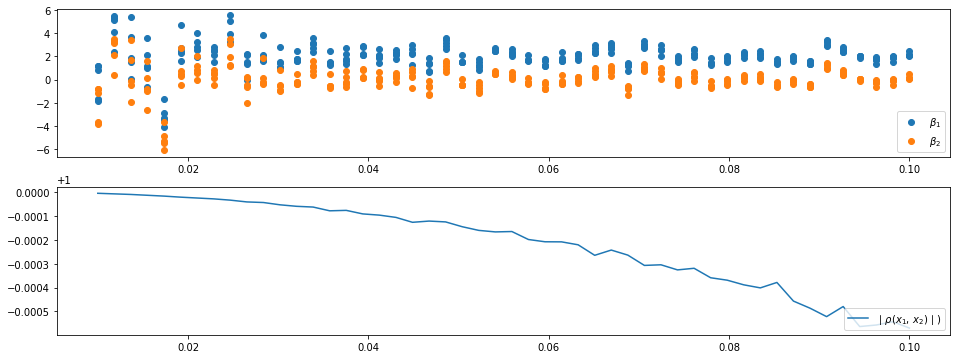

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 6))

coef_plot = axes[0]
corr_plot = axes[1]

coef_plot.scatter(plot_df["gamma_std"], plot_df["beta_1"], label=r"$\beta_{1}$")
coef_plot.scatter(plot_df["gamma_std"], plot_df["beta_2"], label=r"$\beta_{2}$")
coef_plot.legend(loc="lower right")

corr_plot.plot(
    plot_df["gamma_std"],
    plot_df["r"].abs(),
    label=r"$\mid\rho(x_{1},\,x_{2})\mid$)",
)
corr_plot.legend(loc="lower right")